In [1]:
from ml.features.preprocessing import get_data
from ml.ml_functions.registry.model_registry import log_sklearn_model_to_mlflow
from ml.ml_functions.serve.mlflow_model_serve import mlflow_model_prediction

In [2]:
import os
os.path.join(os.path.abspath("metadata"), "acutal_model.txt")

'/home/erik/DataspellProjects/stock-prediction/ml/ml_functions/metadata/acutal_model.txt'

In [3]:
from ml.ml_functions.registry.model_registry import save_model_path,load_model_path
#save_model_path(actual_model_path)
load_model_path()

Model path file not found.


'runs:/4df9743095004dd1ad96955ee05b9a34/model'

## Load Dataset with new Features

In [4]:
stock_data, last_day_df = get_data(save_data=False, new_model=None)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
stock_data

,Close,Volume,Target,SMA 10,EMA 10,EMA 20,WMA 10,Momentum 10,SAR,RSI,...,^IBEX Close,SI=F Close,HG=F Close,NG=F Close,^TNX Close,^IRX Close,^FVX Close,^TYX Close,SPY Close,EFA Close
Date,,,,,,,,,,,,,,,,,,,,,
2000-09-18,1444.510010,9.625000e+08,0,1484.369006,1479.491052,1484.344255,1476.255833,-76.260010,1505.653274,35.962151,...,11188.099609,4.876000,0.9185,5.295,5.871,5.950,5.900,5.956,144.656250,42.833332
2000-09-19,1459.900024,1.024900e+09,0,1479.651013,1475.929047,1482.016233,1471.806927,-47.179932,1496.730622,43.209946,...,11065.500000,4.883000,0.9215,5.370,5.850,5.970,5.907,5.914,145.968750,42.833332
2000-09-20,1451.339966,1.104000e+09,0,1475.560010,1471.458305,1479.094683,1466.659464,-40.910034,1489.057141,40.466555,...,10901.299805,4.830000,0.9015,5.320,5.892,5.970,5.953,5.962,144.890625,42.833332
2000-09-21,1449.050049,1.105400e+09,0,1470.214014,1467.384077,1476.233290,1461.839471,-53.459961,1479.759991,39.739686,...,10803.400391,4.872000,0.9255,5.287,5.871,5.960,5.945,5.927,142.687500,42.833332
2000-09-22,1448.719971,1.185500e+09,0,1465.636011,1463.990603,1473.612974,1457.931463,-45.780029,1471.950384,39.629187,...,11029.400391,4.910000,0.9195,5.131,5.829,5.970,5.905,5.904,145.281250,42.833332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-06,4549.339844,4.245680e+09,0,4562.058984,4550.991655,4507.049249,4564.082138,11.149902,4599.390137,62.812044,...,10258.099609,23.889000,3.7165,2.569,4.121,5.243,4.121,4.224,454.760010,72.570000
2023-12-07,4585.589844,3.818880e+09,0,4564.955957,4557.282235,4514.529306,4568.360476,28.969727,4598.332334,67.249529,...,10146.000000,23.732000,3.7845,2.585,4.129,5.233,4.110,4.246,458.230011,72.919998
2023-12-08,4604.370117,3.707010e+09,0,4569.458984,4565.843668,4523.085573,4575.526687,45.030273,4546.500000,69.293804,...,10223.400391,22.971001,3.8200,2.581,4.245,5.233,4.255,4.325,460.200012,73.139999


## Train your Sklearn-Model

Modellname: ExtraTreesClassifier
Genauigkeit: 0.9205128205128205


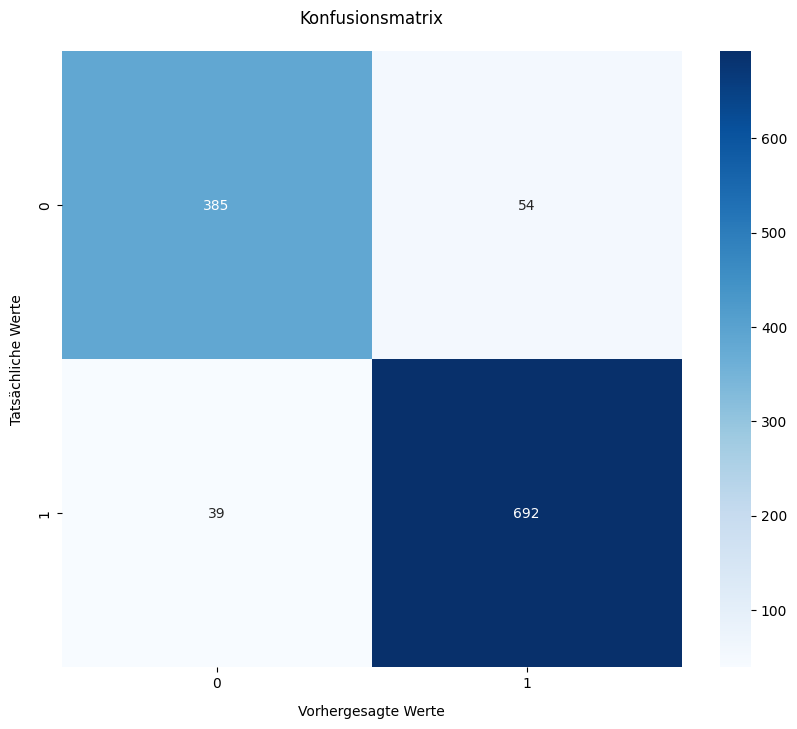

<Figure size 640x480 with 0 Axes>

In [5]:
from ml.ml_functions.training.train_extra_tree import train_extra_tree

model, accuracy = train_extra_tree(stock_data)

## Model Registry 

 ml/models mlflow server --host 0.0.0.0 --port 5000

### mlflow server --host 0.0.0.0 --port 5000


In [5]:
actual_model_path = log_sklearn_model_to_mlflow(model=model, accuracy=accuracy)

2023/12/16 11:29:42 INFO mlflow.tracking.fluent: Experiment with name 'sp500_prediction' does not exist. Creating a new experiment.
2023/12/16 11:29:52 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: best_ExtraTreesClassifier_model, version 1


First model registered as best model!
Model path saved!


## Test if model is working

In [8]:
last_day_df = last_day_df.drop(columns=last_day_df.columns[-3:])

In [10]:
model.predict(last_day_df)

array([0])

In [12]:
from ml.ml_functions.registry.model_registry import save_model_path,load_model_path
#save_model_path(actual_model_path)
load_model_path()

'runs:/5a62984791c945a1bae69cd36a1a23fb/model'

## Save current feature data for prediction

In [3]:
stock_data, last_day_df = get_data(save_data=True, new_model=(model.__class__.__name__, accuracy))

NameError: name 'model' is not defined

### Predict the new Data with Mlflow-Model

In [2]:
#result = mlflow_model_prediction(model=actual_model_path)
result = mlflow_model_prediction()

/home/erik/DataspellProjects/stock-prediction/ml/ml_functions


/home/erik/anaconda3/envs/Stock-Prediction/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(


Complete. Return to the InfluxDB UI.
Vorhersage wurde erstellt
